In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report





In [2]:
# Load the dataset
data = 'copper.csv'
df = pd.read_csv(data)

In [3]:
df.head(30)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.000,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.800,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.380,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.300,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.000,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
5,FE372230-29B1-4A29-BB73-CB9D3078C286,20210401.0,225.790676,30202938.0,25.0,Won,W,41.0,1.500,1265.0,102325,1668701718,20210401.0,983.00
6,E1B47219-42C8-411D-AE46-AD5256DC4757,20210401.0,3.522613,30209509.0,30.0,Draft,W,41.0,0.380,1125.0,NBW_L+_A_1125_0.4,611993,20210701.0,18.00
7,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,20210401.0,113.387124,30342192.0,32.0,Won,W,41.0,0.680,1220.0,1000944,611993,20210101.0,931.00
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,20210401.0,69.071853,30341428.0,38.0,Won,S,10.0,0.600,1275.0,106786,1668701376,20210701.0,1363.00
9,6E4D638C-A820-4A40-836F-C9D48BC65528,20210401.0,630.626917,30202938.0,25.0,Won,W,41.0,1.500,1165.0,102325,1668701718,20210401.0,983.00


In [4]:
print(df.shape)

(181673, 14)


In [5]:
print(df['status'].unique())


['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable' nan]


In [6]:
df['material_ref'] = df['material_ref'].apply(lambda x: None if str(x).startswith('00000') else x)


In [7]:
continuous_cols = ['quantity tons', 'thickness', 'width', 'selling_price']
for col in continuous_cols:
    print(f"{col}: {df[col].apply(type).unique()}")


quantity tons: [<class 'float'> <class 'str'>]
thickness: [<class 'float'>]
width: [<class 'float'>]
selling_price: [<class 'float'>]


In [8]:
for col in continuous_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [9]:
for col in continuous_cols:
    df[col].fillna(df[col].mean(), inplace=True)


In [10]:
# Fill missing values for continuous variables with mean
continuous_cols = ['quantity tons', 'thickness', 'width', 'selling_price']
for col in continuous_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing values for categorical variables with mode
categorical_cols = ['material_ref', 'item type', 'status', 'customer', 'country', 'application']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [11]:
print(df['status'].unique())


['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']


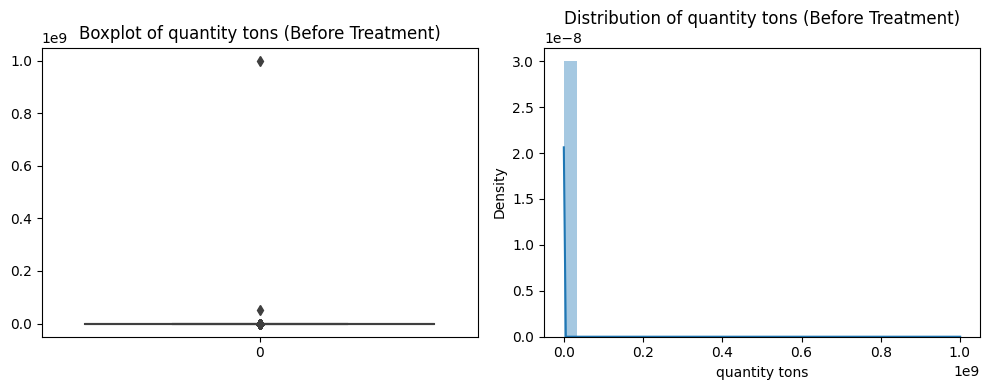

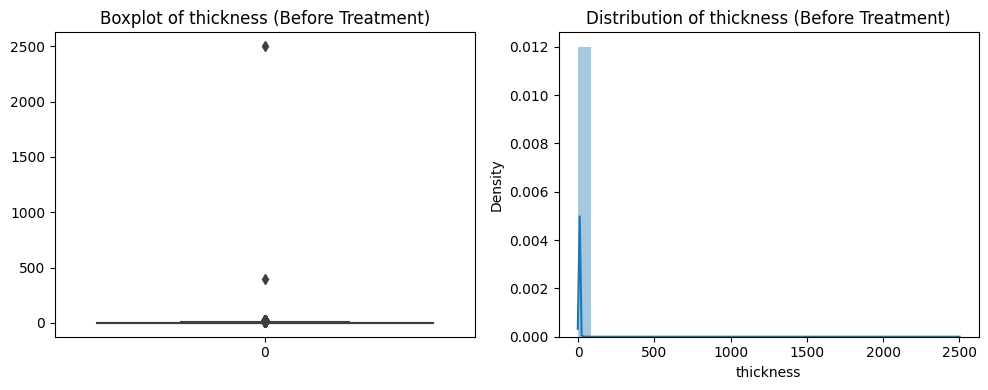

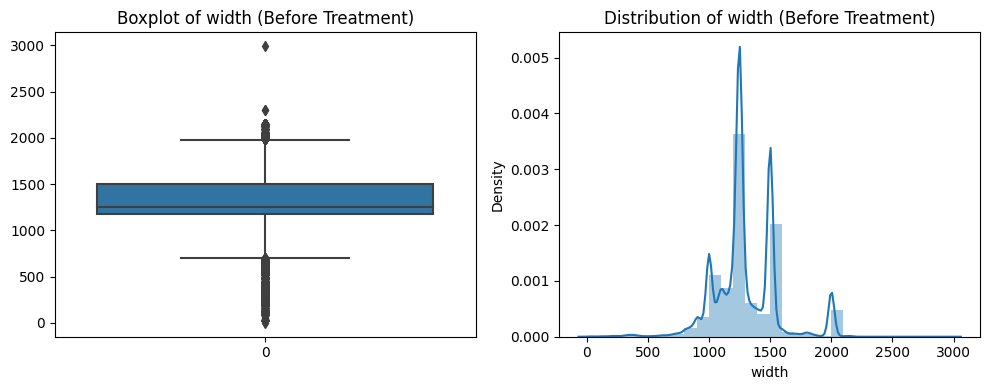

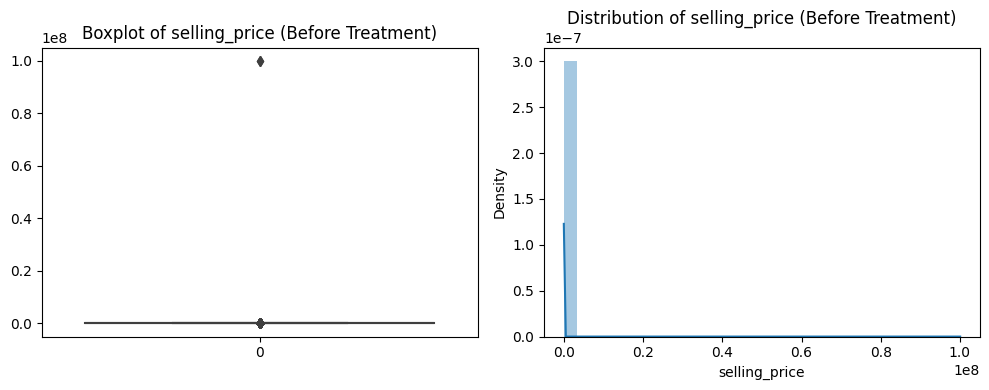

In [12]:
for col in continuous_cols:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col} (Before Treatment)')
    
    plt.subplot(1, 2, 2)
    sns.distplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col} (Before Treatment)')
    
    plt.tight_layout()
    plt.show()

In [13]:
# outliers
Q1 = df[continuous_cols].quantile(0.25)
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[continuous_cols] < (Q1 - 1.5 * IQR)) | (df[continuous_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [14]:
# Identify Skewness
skewness = df[continuous_cols].skew()
print(skewness)


quantity tons    1.292749
thickness        1.270933
width           -0.008637
selling_price    0.323586
dtype: float64


In [15]:
# Treat Skewness
# Log Transformation
import numpy as np

for col in continuous_cols:
    if skewness[col] > 0.5:
        df[col] = df[col].apply(lambda x: np.log(x) if x > 0 else x)


In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # Store label encoders for later use

for col in ['material_ref', 'item type', 'status', 'customer', 'country', 'application']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


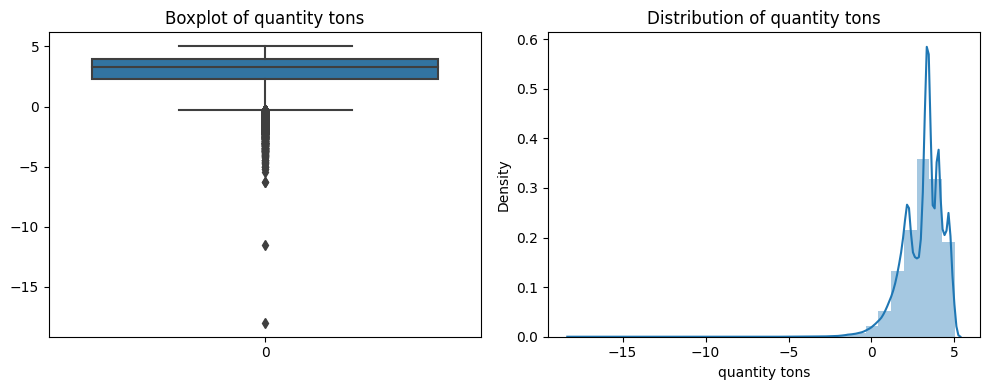

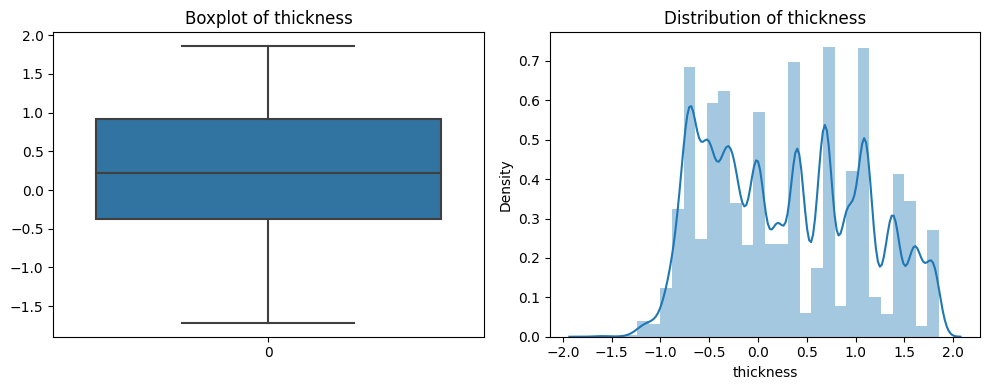

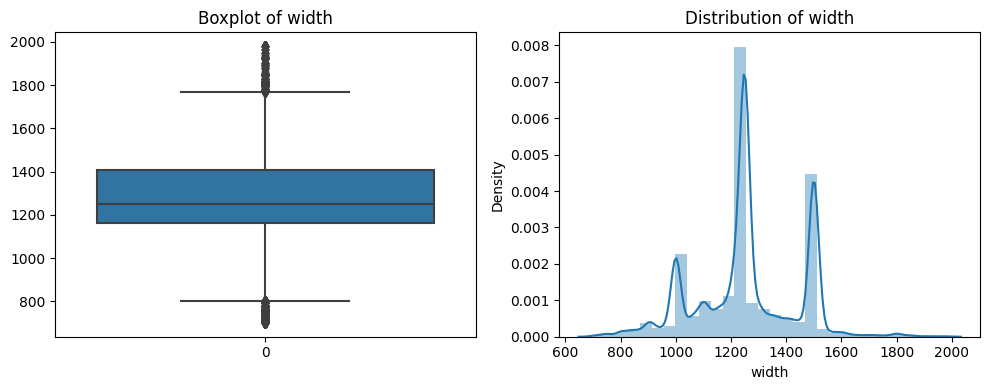

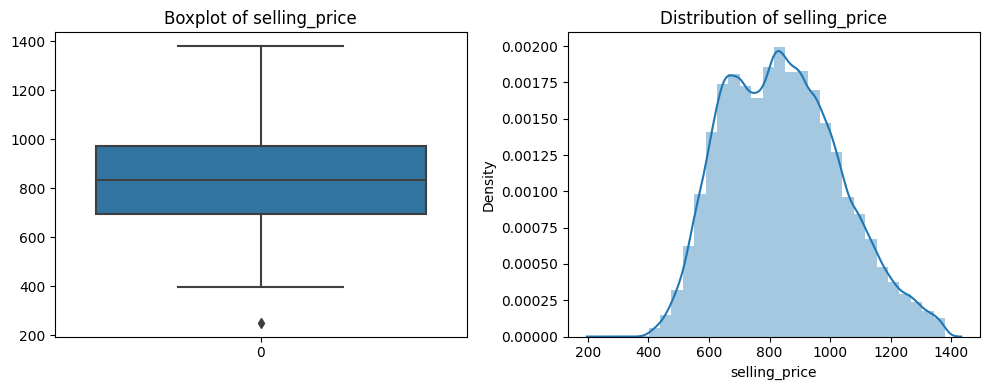

In [17]:
# Visualizing Outliers using Boxplots
for col in continuous_cols:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.subplot(1, 2, 2)
    sns.distplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

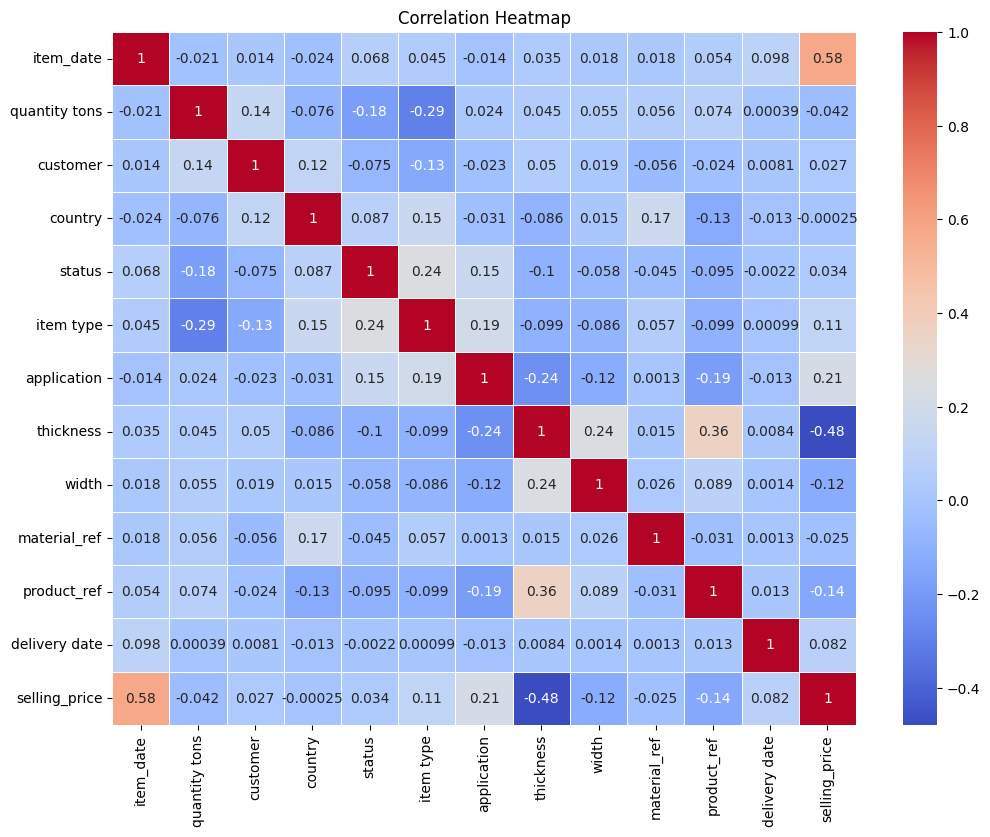

In [18]:
# Only include numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [19]:
print(df['status'].unique())


[6 5 0 1 7 4 3 2]


In [20]:
print(df['status'].value_counts())


status
6    91160
0    23883
1    14793
5     3292
4     3282
3       52
2       10
7        1
Name: count, dtype: int64


## Model Building and Evaluation

In [21]:
# Splitting the Data
# Filter the data to include only rows with status as WON or LOST
#df = df[df['status'].isin([6,1])]

# Encode the target variable
#df['status'] = df['status'].map({6: 1, 1: 0})

# Assuming 'status' is the target variable for classification and 'selling_price' for regression
X_class = df.drop('status', axis=1)
y_class = df['status']

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

X_regress = df.drop('selling_price', axis=1)
y_regress = df['selling_price']

X_regress_train, X_regress_test, y_regress_train, y_regress_test = train_test_split(X_regress, y_regress, test_size=0.3, random_state=42)


In [22]:
non_numeric_cols = X_class_train.select_dtypes(include=['object']).columns
print(non_numeric_cols)


Index(['id'], dtype='object')


In [23]:
# Drop columns like IDs or UUIDs
X_class = X_class.drop('id', axis=1)


In [24]:
print(X_class.columns)


Index(['item_date', 'quantity tons', 'customer', 'country', 'item type',
       'application', 'thickness', 'width', 'material_ref', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')


In [25]:

# Using sparse matrix for one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=True)
encoded_features = encoder.fit_transform(X_class[['material_ref', 'item type', 'customer', 'country', 'application']])

# Using the sparse matrix directly in models that support it


In [26]:
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_features, columns=encoder.get_feature_names_out(['material_ref', 'item type', 'customer', 'country', 'application']))


In [27]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_features, y_class, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((95531, 14541), (40942, 14541))

In [28]:

# Retrain with reduced number of trees
et_model = ExtraTreesClassifier(n_estimators=10, random_state=42)
et_model.fit(X_train, y_train)
print("Extra Trees trained successfully!")

Extra Trees trained successfully!


In [29]:
# Predict
y_pred_et = et_model.predict(X_test)

# Evaluate
metrics_et = {
    "Accuracy": accuracy_score(y_test, y_pred_et),
    "Precision (weighted)": precision_score(y_test, y_pred_et, average='weighted'),
    "Recall (weighted)": recall_score(y_test, y_pred_et, average='weighted'),
    "F1 Score (weighted)": f1_score(y_test, y_pred_et, average='weighted'),
    # Note: Directly using AUC for multiclass isn't typical. You might consider using a OneVsRest classifier to get per-class AUC.
    # "AUC": roc_auc_score(y_test, y_pred_et)  # Commented out for now
}

metrics_et


{'Accuracy': 0.7562893849836354,
 'Precision (weighted)': 0.7344889258147203,
 'Recall (weighted)': 0.7562893849836354,
 'F1 Score (weighted)': 0.7422676151329318}

In [30]:
# RandomizedSearchCV

# Define the hyperparameters and their respective distributions
param_dist = {
    'n_estimators': randint(10, 100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    ExtraTreesClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # number of iterations
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # use all available cores
)

random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
best_score = random_search.best_score_

best_params, best_score


Fitting 3 folds for each of 20 candidates, totalling 60 fits


({'bootstrap': True,
  'max_depth': 3,
  'max_features': 'log2',
  'min_samples_leaf': 8,
  'min_samples_split': 6,
  'n_estimators': 33},
 0.6671028254071071)

In [31]:
print("Unique values in y_test:", np.unique(y_test))


Unique values in y_test: [0 1 2 3 4 5 6]


In [32]:


# Training the ExtraTreesClassifier with the provided best parameters
best_et = ExtraTreesClassifier(**best_params, random_state=42)
best_et.fit(X_train, y_train)

# Predicting using the trained model
y_pred = best_et.predict(X_test)

# Defining target names based on unique values in y_test
target_names = [str(x) for x in np.unique(y_test)]

# Assuming you've already predicted y_pred from your model
report = classification_report(y_test, y_pred, target_names=['0', '1', '2', '3', '4', '5', '6'])

# Printing the formatted report
print(report)




              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7096
           1       0.00      0.00      0.00      4394
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00      1005
           5       0.00      0.00      0.00       993
           6       0.67      1.00      0.80     27431

    accuracy                           0.67     40942
   macro avg       0.10      0.14      0.11     40942
weighted avg       0.45      0.67      0.54     40942



In [35]:
from sklearn.ensemble import ExtraTreesRegressor

# Setting up data for regression
X_reg = df.drop('selling_price', axis=1)
y_reg = df['selling_price']

# Splitting the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Dropping the 'id' column for regression
X_train_reg = X_train_reg.drop('id', axis=1)
X_test_reg = X_test_reg.drop('id', axis=1)

# Dropping the 'status' column for regression
X_train_reg = X_train_reg.drop('status', axis=1)
X_test_reg = X_test_reg.drop('status', axis=1)

# Keeping only numeric columns for regression training
X_train_reg = X_train_reg.select_dtypes(include=[np.number])
X_test_reg = X_test_reg.select_dtypes(include=[np.number])

# Dropping all non-numeric columns for regression training
X_train_reg = X_train_reg.select_dtypes(exclude=['object'])
X_test_reg = X_test_reg.select_dtypes(exclude=['object'])

# Imputing missing values with the mean of the respective columns
X_train_reg = X_train_reg.fillna(X_train_reg.mean())
X_test_reg = X_test_reg.fillna(X_train_reg.mean())



# Training the ExtraTreesRegressor again
et_regressor.fit(X_train_reg, y_train_reg)

# Predicting using the trained regressor
y_pred_reg = et_regressor.predict(X_test_reg)

# Evaluating the regression model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

mse, r2

(1757.844967136136, 0.951892286906773)